In [1]:
import pandas as pd
import numpy as np

In [2]:
tweets = pd.read_csv('tweets.csv')

c:\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
tweets.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0.0,0.0,19727712.0,True,hi,NaN,NaN,Twitter Media Studio
1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,NaN,NaN,Twitter Web App
2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,NaN,NaN,Twitter for Android
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,NaN,NaN,Twitter for Android
4,2023-02-21 03:27:38+00:00,Turkiye Earthquake: तुर्किए में फिर आया भूकंप ...,"['turkey', 'earthquake', 'turkiye', 'india', '...",0.0,0.0,17.0,False,und,NaN,NaN,Twitter for Android


In [4]:
tweets.shape

(478052, 11)

In [5]:
tweets.isnull().sum()

date                    0
content                 0
hashtags               18
like_count             17
rt_count               17
followers_count        17
isVerified             17
language               17
coordinates        457383
place              457856
source                 17
dtype: int64

In [6]:
tweets.drop(['coordinates', 'place'], axis=1, inplace=True)

In [7]:
tweets.isnull().sum()

date                0
content             0
hashtags           18
like_count         17
rt_count           17
followers_count    17
isVerified         17
language           17
source             17
dtype: int64

In [8]:
tweets.dropna(inplace=True)

In [9]:
tweets.isnull().sum()

date               0
content            0
hashtags           0
like_count         0
rt_count           0
followers_count    0
isVerified         0
language           0
source             0
dtype: int64

In [10]:
tweets[tweets['language'] == 'hi']['content'][12]

'Turkey में बड़े भूकंप के बाद 32वीं बार कांपी धरती, इस बार भी गई तीन की जान #turkey #earthquake #trembled #death https://t.co/ejistQfNsu'

In [11]:
temp = 'तुर्की में सोमवार देर रात भूंकप के तेज झटके महसूस किए गए. हताय प्रांत में 6.4 तीव्रता का भूकंप महसूस किया गया. 6 फरवरी को 7.4 तीव्रता के महाविनाशकारी भूकंप के बाद एक बार फिर तुर्की में दहशत का माहौल है.  #ATDigital #Turkey #Earthquake #TurkeyEarthquake https://t.co/fdc7uztUEb'

In [12]:
import re
pattern_url = re.compile('https:.{7}\S{10}')
temp = re.sub(pattern_url, ' ', temp).strip()
temp

'तुर्की में सोमवार देर रात भूंकप के तेज झटके महसूस किए गए. हताय प्रांत में 6.4 तीव्रता का भूकंप महसूस किया गया. 6 फरवरी को 7.4 तीव्रता के महाविनाशकारी भूकंप के बाद एक बार फिर तुर्की में दहशत का माहौल है.  #ATDigital #Turkey #Earthquake #TurkeyEarthquake'

In [13]:
re.findall(r"(#+[a-zA-Z0-9(_)]{1,})", temp)

['#ATDigital', '#Turkey', '#Earthquake', '#TurkeyEarthquake']

In [14]:
def remove_url(text):
    pattern_url = re.compile('https:.{7}\S{10}')
    text = re.sub(pattern_url, ' ', text).strip()
    return text

In [15]:
tweets['content'] = tweets['content'].apply(remove_url)

In [16]:
tweets['content'][0]

'तुर्की में सोमवार देर रात भूंकप के तेज झटके महसूस किए गए. हताय प्रांत में 6.4 तीव्रता का भूकंप महसूस किया गया. 6 फरवरी को 7.4 तीव्रता के महाविनाशकारी भूकंप के बाद एक बार फिर तुर्की में दहशत का माहौल है.  #ATDigital #Turkey #Earthquake #TurkeyEarthquake'

In [17]:
tweets['hash_tags'] = tweets['content'].str.findall(r"(#+[a-zA-Z0-9(_)]{1,})")

In [18]:
tweets['hash_tags'][0]

['#ATDigital', '#Turkey', '#Earthquake', '#TurkeyEarthquake']

In [19]:
tweets['content'][0]

'तुर्की में सोमवार देर रात भूंकप के तेज झटके महसूस किए गए. हताय प्रांत में 6.4 तीव्रता का भूकंप महसूस किया गया. 6 फरवरी को 7.4 तीव्रता के महाविनाशकारी भूकंप के बाद एक बार फिर तुर्की में दहशत का माहौल है.  #ATDigital #Turkey #Earthquake #TurkeyEarthquake'

In [20]:
def remove_hash(text):
    pattern_hash = re.compile('(#+[a-zA-Z0-9(_)]{1,})')
    text = re.sub(pattern_hash, ' ', text).strip()
    return text

In [21]:
tweets['content'] = tweets['content'].apply(remove_hash)

In [22]:
tweets['content'][0]

'तुर्की में सोमवार देर रात भूंकप के तेज झटके महसूस किए गए. हताय प्रांत में 6.4 तीव्रता का भूकंप महसूस किया गया. 6 फरवरी को 7.4 तीव्रता के महाविनाशकारी भूकंप के बाद एक बार फिर तुर्की में दहशत का माहौल है.'

In [23]:
tweets.columns

Index(['date', 'content', 'hashtags', 'like_count', 'rt_count',
       'followers_count', 'isVerified', 'language', 'source', 'hash_tags'],
      dtype='object')

In [24]:
tweets.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,source,hash_tags
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0.0,0.0,19727712.0,True,hi,Twitter Media Studio,"[#ATDigital, #Turkey, #Earthquake, #TurkeyEart..."
1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,Twitter Web App,"[#Hatay, #earthquakes, #T, #TurkiyeQuakes, #Tu..."
2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,Twitter for Android,"[#Turkey, #earthquake, #turkeyearthquake2023, ..."
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,Twitter for Android,"[#turkeyearthquake2023, #earthquake, #Syria]"
4,2023-02-21 03:27:38+00:00,Turkiye Earthquake: तुर्किए में फिर आया भूकंप,"['turkey', 'earthquake', 'turkiye', 'india', '...",0.0,0.0,17.0,False,und,Twitter for Android,"[#turkey, #earthquake, #turkiye, #india, #oper..."


In [25]:
tweets['day'] = pd.to_datetime(tweets['date']).dt.day

In [26]:
tweets['hour'] = pd.to_datetime(tweets['date']).dt.hour

In [27]:
tweets.columns

Index(['date', 'content', 'hashtags', 'like_count', 'rt_count',
       'followers_count', 'isVerified', 'language', 'source', 'hash_tags',
       'day', 'hour'],
      dtype='object')

In [28]:
tweets.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,source,hash_tags,day,hour
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0.0,0.0,19727712.0,True,hi,Twitter Media Studio,"[#ATDigital, #Turkey, #Earthquake, #TurkeyEart...",21,3
1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,Twitter Web App,"[#Hatay, #earthquakes, #T, #TurkiyeQuakes, #Tu...",21,3
2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,Twitter for Android,"[#Turkey, #earthquake, #turkeyearthquake2023, ...",21,3
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,Twitter for Android,"[#turkeyearthquake2023, #earthquake, #Syria]",21,3
4,2023-02-21 03:27:38+00:00,Turkiye Earthquake: तुर्किए में फिर आया भूकंप,"['turkey', 'earthquake', 'turkiye', 'india', '...",0.0,0.0,17.0,False,und,Twitter for Android,"[#turkey, #earthquake, #turkiye, #india, #oper...",21,3


In [29]:
tweets.isnull().sum()

date               0
content            0
hashtags           0
like_count         0
rt_count           0
followers_count    0
isVerified         0
language           0
source             0
hash_tags          0
day                0
hour               0
dtype: int64

In [30]:
# import pickle
# pickle.dump(tweets, open('tweets.pkl', 'wb'))

In [31]:
likes = tweets[tweets['source'] == 'TINS'].sum()['like_count']
int(likes)

54

In [32]:
tweets[tweets['source'] == 'Twitter Media Studio']['isVerified'].head(1)[0]

True

In [60]:
x = tweets['language'].value_counts().head(20).reset_index()

In [552]:
x

,index,language
0,en,189626
1,tr,140532
2,qme,38828
3,ar,17059
4,qht,13479
5,und,11907
6,es,11168
7,hi,8171
8,ur,8021
9,in,4299


In [59]:
x.rename(columns = {'language':'count', 'index':'language'}, inplace=True)

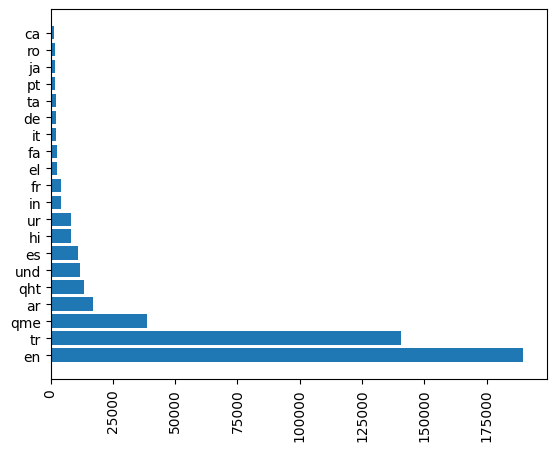

In [42]:
import matplotlib.pyplot as plt
plt.barh(x['language'], x['count'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
tweets.columns

Index(['date', 'content', 'hashtags', 'like_count', 'rt_count',
       'followers_count', 'isVerified', 'language', 'source', 'hash_tags',
       'day', 'hour'],
      dtype='object')

In [53]:
tweets['hash_tags'].head(10)

0    [#ATDigital, #Turkey, #Earthquake, #TurkeyEart...
1    [#Hatay, #earthquakes, #T, #TurkiyeQuakes, #Tu...
2    [#Turkey, #earthquake, #turkeyearthquake2023, ...
3         [#turkeyearthquake2023, #earthquake, #Syria]
4    [#turkey, #earthquake, #turkiye, #india, #oper...
5    [#Earthquake, #Hatay, #Turkey, #turkeyearthqua...
6                [#T, #Syria, #earthquake, #Canadians]
7                               [#earthquake, #Turkey]
8        [#earthquake, #Turkey, #turkeyearthquake2023]
9                               [#Earthquake, #turkey]
Name: hash_tags, dtype: object

In [55]:
hash_for_word_cloud = tweets.sort_values(by='followers_count', ascending=False).head(20)['hash_tags'].reset_index()

In [61]:
z = tweets['day'].value_counts().reset_index()
z.rename(columns = {'index':'date', 'day':'tweets'}, inplace=True)

In [498]:
day_df = pd.DataFrame(list(tweets.groupby('day')['hash_tags']))
day_df.columns = ['date', 'hashtags']

In [499]:
day_df['hashtags'][0]

303020                             [#earthquake, #oneloves]
303021          [#TurkeyEarthquake, #Syria, #PrayForTurkey]
303022    [#deprem, #Turkey, #enkazalt, #hataydeprem, #o...
303023                           [#Syria, #earthquakesyria]
303024    [#Turkey, #ohal, #iskenderun, #seferberlik, #D...
                                ...                        
478047    [#immigrant, #germany, #turkey, #international...
478048                  [#Earthquake, #terremoto), #Spain)]
478049             [#Earthquake, #sismo), #Calama, #Chile)]
478050    [#ottomanempire, #ottoman, #osman, #osmanbey, ...
478051                   [#Arabs, #Kurds, #Yazidis, #Syria]
Name: hash_tags, Length: 175031, dtype: object

In [500]:
# finding top 10 hash tags for first day
hold = pd.DataFrame(np.hstack(day_df['hashtags'][0])).value_counts().head()

In [501]:
hold.index

MultiIndex([(          '#Turkey',),
            (      '#earthquake',),
            (          '#deprem',),
            (           '#Syria',),
            ('#TurkeyEarthquake',)],
           )

In [502]:
v1 = hold.index
v2 = hold.values
v1 = [i[0] for i in v1]


In [503]:
np.array(v1)

array(['#Turkey', '#earthquake', '#deprem', '#Syria', '#TurkeyEarthquake'],
      dtype='<U17')

In [504]:
pd.DataFrame({'hashtag':np.array(v1), 'Frequency':v2})

,hashtag,Frequency
0,#Turkey,122324
1,#earthquake,67432
2,#deprem,60792
3,#Syria,29935
4,#TurkeyEarthquake,16033


In [510]:
top_hashtags = pd.DataFrame()
day_hash_freq = pd.DataFrame()
for i in range(len(day_df)):
    hold = pd.DataFrame(np.hstack(day_df['hashtags'][i])).value_counts().head(15)
    v1 = hold.index
    v2 = hold.values
    v1 = [i[0] for i in v1]
    v1 = np.array(v1)
    day_hash_freq = day_hash_freq.append(pd.DataFrame({'date':day_df['date'][i], 'hashtag':v1, 'Frequency':v2}), ignore_index=True) 
    top_hashtags = top_hashtags.append(pd.DataFrame({'hashtag':v1, 'Frequency':v2}), ignore_index=True)

In [511]:
day_hash_freq.head(20)

,date,hashtag,Frequency
0,6,#Turkey,122324
1,6,#earthquake,67432
2,6,#deprem,60792
3,6,#Syria,29935
4,6,#TurkeyEarthquake,16033
5,6,#PrayForTurkey,15372
6,6,#Hatay,13134
7,6,#AFAD,12724
8,6,#Gaziantep,10225
9,6,#Turkiye,9881


In [512]:
top_hashtags['hashtag'].unique()

array(['#Turkey', '#earthquake', '#deprem', '#Syria', '#TurkeyEarthquake',
       '#PrayForTurkey', '#Hatay', '#AFAD', '#Gaziantep', '#Turkiye',
       '#enkazalt', '#Kahramanmaras', '#AC', '#Enkaz', '#Earthquake',
       '#seferberlik', '#hatayyardimbekliyor', '#sondakikadeprem',
       '#earthquakeinturkey', '#TurkeyQuake', '#HelpTurkey', '#YARDIM',
       '#acildeprem', '#hatayiskenderun', '#TurkeySyriaEarthquake',
       '#turkey', '#depremsondakika', '#depremden', '#hatay', '#T',
       '#syria', '#terremoto', '#earthquaketurkey', '#Syria_earthquake',
       '#kahramamaras', '#depremzede', '#Turkey)', '#deprem)', '#SYRIA',
       '#StopSanctionsOnSyrians', '#G', '#Israel',
       '#turkeyearthquake2023', '#Antioch', '#Ukraine', '#AtomicHeart'],
      dtype=object)

In [513]:
top_hashtags = top_hashtags.sort_values(by = 'Frequency', ascending=False, ignore_index=True).head(30)
top_hashtags = pd.DataFrame(top_hashtags['hashtag'].unique())
top_hashtags.columns = ['hashtag']

In [514]:
top_hashtags

,hashtag
0,#Turkey
1,#earthquake
2,#deprem
3,#Syria
4,#seferberlik
5,#hatayyardimbekliyor
6,#TurkeyEarthquake
7,#sondakikadeprem
8,#PrayForTurkey
9,#Hatay


In [521]:
day_hash_freq = day_hash_freq.merge(top_hashtags, on='hashtag').sort_values(by='date', ascending=True)

In [540]:
table = day_hash_freq.pivot_table(index='date', columns='hashtag', values='Frequency', aggfunc='sum').fillna(0).astype('int')

<AxesSubplot:xlabel='hashtag', ylabel='date'>

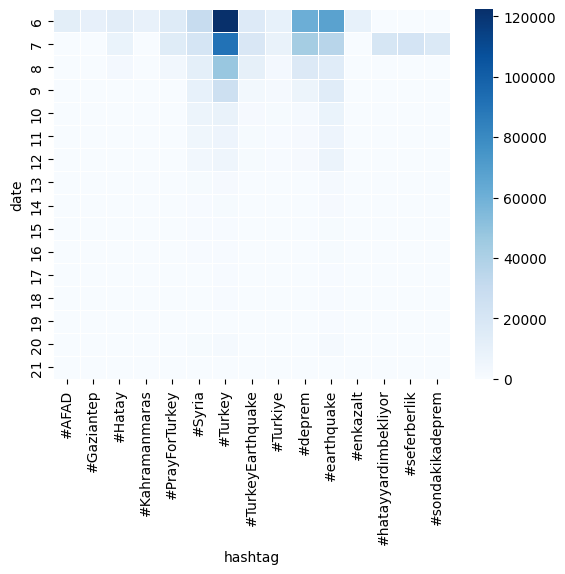

In [543]:
import seaborn as sns
sns.heatmap(table, linewidths=0.5, cmap="Blues")

In [545]:
import pickle
pickle.dump(table, open('table.pkl', 'wb'))

In [604]:
unique_lang = tweets['language'].value_counts().head(10).reset_index()
unique_lang['index']

0     en
1     tr
2    qme
3     ar
4    qht
5    und
6     es
7     hi
8     ur
9     in
Name: index, dtype: object

In [644]:
lang_df = tweets[tweets['language'] == 'en']
cnt_lang_df = lang_df['day'].value_counts().reset_index()
cnt_lang_df.rename(columns = {'index':'date', 'day':'freq'}, inplace=True)
cnt_lang_df

,date,freq
0,6,65831
1,7,40741
2,8,23553
3,9,18176
4,10,12454
5,11,9891
6,12,8786
7,13,2241
8,20,2090
9,14,1326


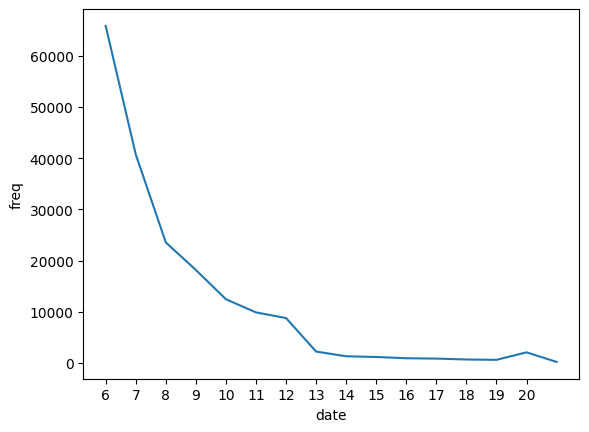

In [623]:
g = sns.lineplot(data=cnt_lang_df, x="date", y="freq")
g.set(xticks=list(range(6,21)))
plt.show()

<AxesSubplot:>

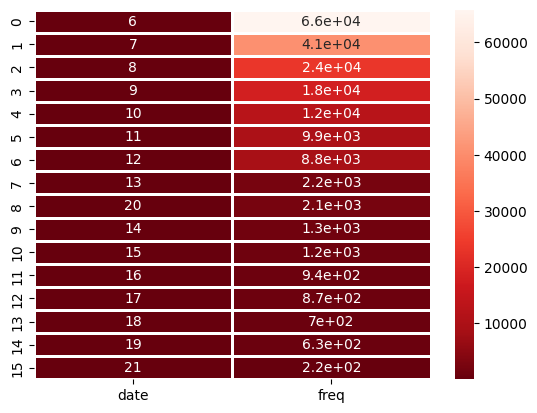

In [620]:
fig, freq_chart = plt.subplots()
sns.heatmap(cnt_lang_df, annot=True, cmap="Reds_r",
                    linewidths=2, ax=freq_chart)

In [624]:
tweets['isVerified'] = tweets['isVerified'].astype(int)
pie_plot_verified = tweets['isVerified'].value_counts()
pie_plot_verified

0    449160
1     28874
Name: isVerified, dtype: int64

In [634]:
pie_plot_verified.rename(index={0: 'Unverified', 1:'Verified'})

Unverified    449160
Verified       28874
Name: isVerified, dtype: int64

In [626]:
pie_plot_verified.values

array([449160,  28874], dtype=int64)

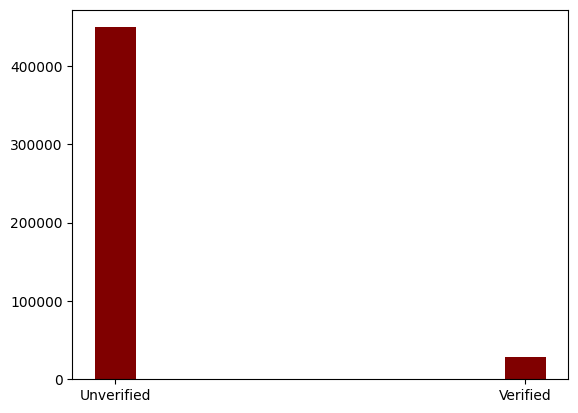

In [632]:
plt.bar(pie_plot_verified.index, pie_plot_verified.values, color ='maroon', width = 0.1, tick_label=['Unverified', 'Verified'])
plt.show()

In [714]:
lang_ver = lang_df['isVerified'].value_counts()
lang_ver.rename(index={0:'Unverified', 1:'Verified'}, inplace=True)
lang_ver = lang_ver.reset_index()
lang_ver

,index,isVerified
0,Unverified,169362
1,Verified,20264


In [715]:
lang_ver.rename(columns={'isVerified':'Tweets', 'index':'Users'}, inplace=True)
lang_ver

,Users,Tweets
0,Unverified,169362
1,Verified,20264


In [661]:
tweets['language'].value_counts().head(20).reset_index()

,index,language
0,en,189626
1,tr,140532
2,qme,38828
3,ar,17059
4,qht,13479
5,und,11907
6,es,11168
7,hi,8171
8,ur,8021
9,in,4299
